In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise2/THIN/size


## Analysis of results with double precision

In [3]:
methods = ['mkl', 'oblas', 'blis']
precision = ['float', 'double']
placement = ['close', 'spread']

In [4]:
df = pd.DataFrame(columns=['Size', 'Time', 'GFLOPS', 'precision', 'method', 'placement'])
df

,Size,Time,GFLOPS,precision,method,placement


In [5]:
for pl in placement:
    for m in methods:
        for prec in precision:
            file_pattern = f"{pl}/{m}_{prec}_*.csv"

            # Get a list of file paths matching the pattern
            file_paths = glob.glob(file_pattern)

            # Initialize an empty list to store DataFrames
            dfs = []

            # Loop through each file and read it into a DataFrame, then add it to the list
            for file_path in file_paths:
                df_temp = pd.read_csv(file_path)
                dfs.append(df_temp)

            # Concatenate all DataFrames in the list into a single DataFrame
            df_temp = pd.concat(dfs, ignore_index=True)
            df_temp['precision'] = prec
            df_temp['method'] = m
            df_temp['placement'] = pl

            # Display the combined DataFrame
            df = pd.concat([df, df_temp])

In [6]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,6.023784,1631.200622,float,mkl,close
1,17000,6.021049,1631.941646,float,mkl,close
2,17000,6.021160,1631.911584,float,mkl,close
3,17000,6.022807,1631.465208,float,mkl,close
4,17000,6.021088,1631.930878,float,mkl,close
...,...,...,...,...,...,...
90,11000,6.469227,411.486548,double,blis,spread
91,11000,6.498823,409.612661,double,blis,spread
92,11000,6.473967,411.185272,double,blis,spread
93,11000,6.507017,409.096804,double,blis,spread


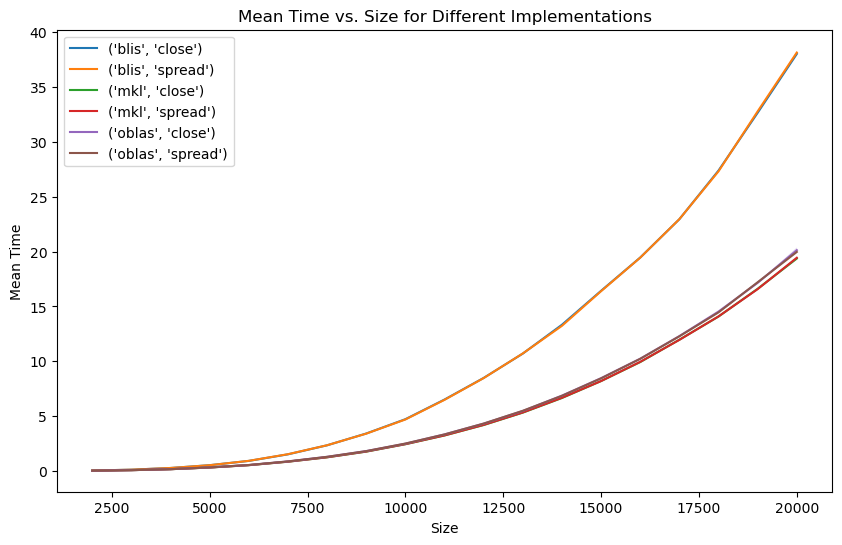

In [12]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.title('Mean Time vs. Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.legend()

# Show the plot
plt.show()


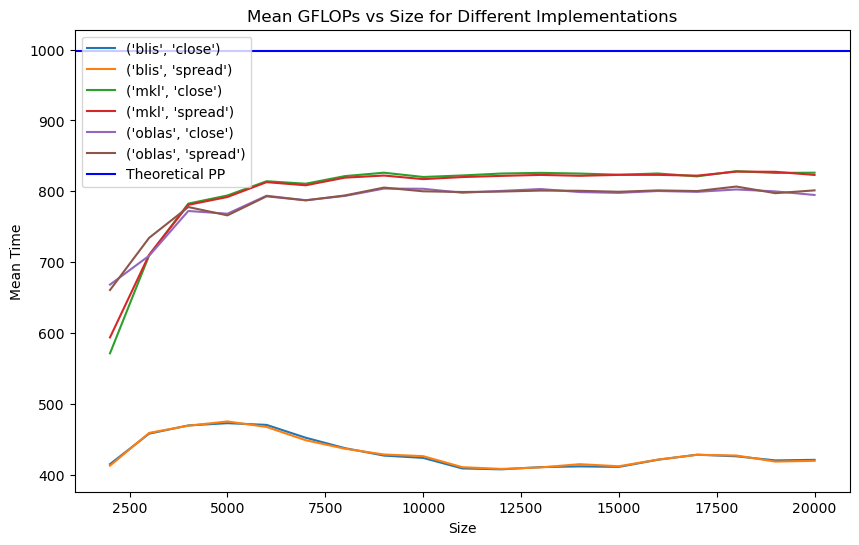

In [13]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0)

# Add labels and legend
plt.title('Mean GFLOPs vs Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.axhline(y = 83.2*12, color = 'b', label = "Theoretical PP")
plt.legend()

# Show the plot
plt.show()

In [14]:
print(agg_df)

    method placement   Size        mean         min         max       std
0     blis     close   2000  414.788737  413.247528  417.726561  1.844592
1     blis     close   3000  457.806469  455.894211  459.010483  1.201226
2     blis     close   4000  469.395160  468.454665  470.398950  0.773840
3     blis     close   5000  472.620378  466.614888  477.059868  4.509811
4     blis     close   6000  470.189199  465.979209  475.074711  3.723790
..     ...       ...    ...         ...         ...         ...       ...
109  oblas    spread  16000  801.223770  800.579912  801.725359  0.468112
110  oblas    spread  17000  800.316517  795.903936  803.009358  2.741197
111  oblas    spread  18000  806.659651  805.099114  807.709353  0.955397
112  oblas    spread  19000  797.290140  789.620085  800.937643  4.444350
113  oblas    spread  20000  801.256509  799.345055  803.992131  2.458153

[114 rows x 7 columns]


- - - 


## Analysis of results with double precision

In [22]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,6.023784,1631.200622,float,mkl,close
1,17000,6.021049,1631.941646,float,mkl,close
2,17000,6.021160,1631.911584,float,mkl,close
3,17000,6.022807,1631.465208,float,mkl,close
4,17000,6.021088,1631.930878,float,mkl,close
...,...,...,...,...,...,...
90,11000,6.469227,411.486548,double,blis,spread
91,11000,6.498823,409.612661,double,blis,spread
92,11000,6.473967,411.185272,double,blis,spread
93,11000,6.507017,409.096804,double,blis,spread


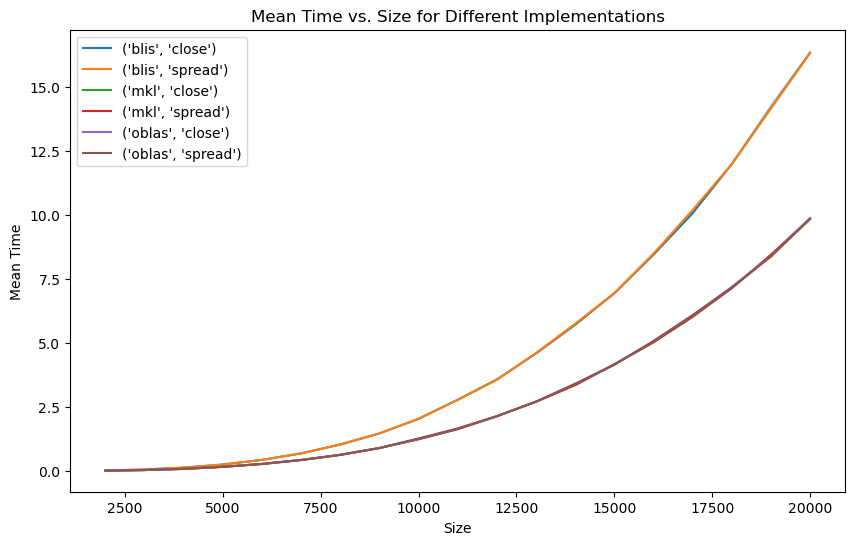

In [23]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.title('Mean Time vs. Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.legend()

# Show the plot
plt.show()


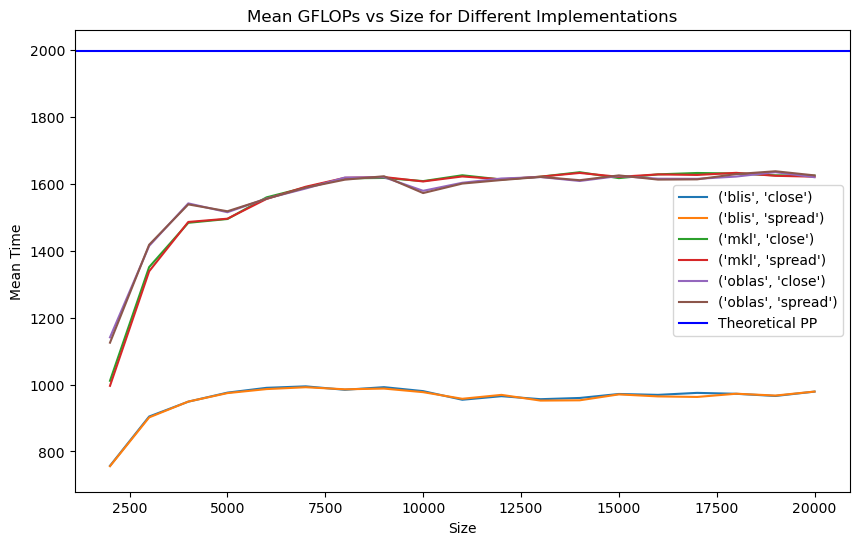

In [24]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0)

# Add labels and legend
plt.title('Mean GFLOPs vs Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.axhline(y = 83.2*12*2, color = 'b', label = "Theoretical PP")
plt.legend()

# Show the plot
plt.show()